### Multi-CPU Performance Analysis

To analyze the performance of distributed training using PyTorch's Distributed Data Parallel (DDP), I ran the script **`DDP_multicpu_analysis_metrics.py`**. The script was executed for configurations with **2, 4, 8, and 16 CPUs**, and the results were saved in JSON files named:

- `Metrics_2_cpus.json`
- `Metrics_4_cpus.json`
- `Metrics_8_cpus.json`
- `Metrics_16_cpus.json`

Each JSON files are under `MultiCPU_Metric_JSONs` dir contains the following details:
1. **Start Time**: Timestamp when the training began.
2. **End Time**: Timestamp when the training completed.
3. **Metrics**:
   - Training step number.
   - Loss recorded at regular intervals.
   - Batch size used.
   - Learning rate.
   - Elapsed time for that step.

These metrics were then processed to compute:
- **Average Training Loss**: Average loss across all recorded steps for each configuration.
- **Elapsed Time**: Total time taken for the training process.
- **Speedup**: The improvement in training time compared to the baseline configuration.

The visualizations generated from this data include:
1. **Elapsed Time vs. Number of CPUs**: Demonstrates how the training time changes with increasing CPU cores.
2. **Speedup vs. Number of CPUs**: Illustrates the relative performance improvement with multi-CPU setups.

This analysis provides insights into the scalability of DDP training on different CPU configurations.

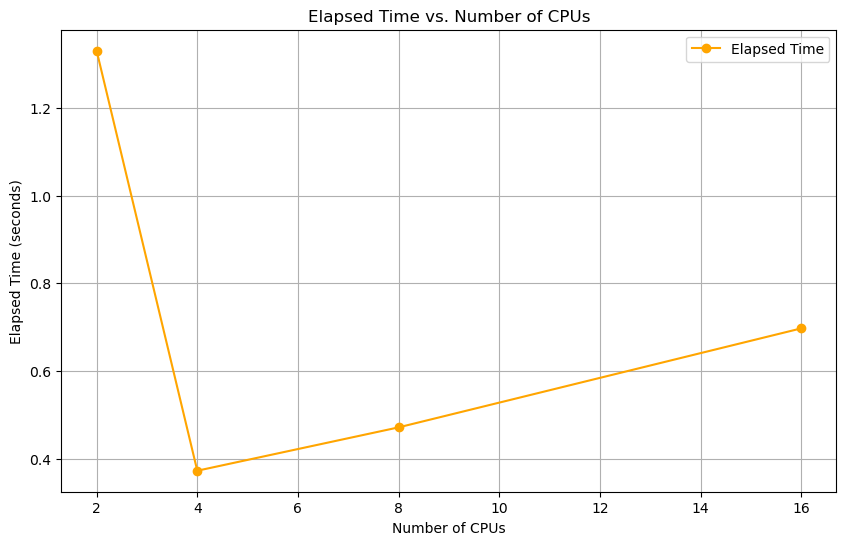

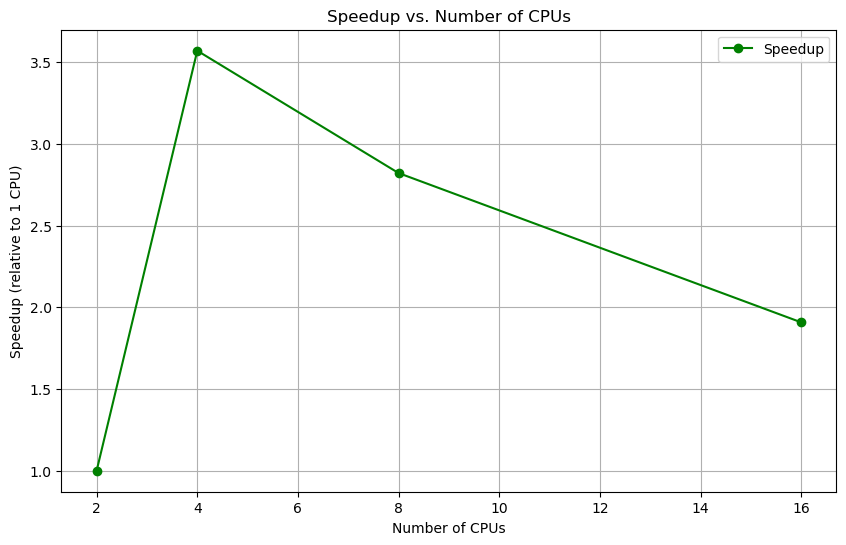

In [17]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load metrics for all CPU configurations
cpu_configs = [2, 4, 8, 16]
metrics_data = []

for cpu in cpu_configs:
    file_name = f"Metrics_{cpu}_cpus.json"
    try:
        with open(file_name, "r") as f:
            data = json.load(f)
            metrics_data.append({"cpus": cpu, "metrics": data["metrics"], "start_time": data["start_time"], "end_time": data["end_time"]})
    except FileNotFoundError:
        print(f"File {file_name} not found. Skipping.")
        continue

# Initialize lists for plotting
cpu_list = []
avg_losses = []
elapsed_times = []

# Process each configuration's metrics
for entry in metrics_data:
    cpus = entry["cpus"]
    metrics = entry["metrics"]
    
    # Calculate average loss and elapsed time
    avg_loss = np.mean([m["loss"] for m in metrics])
    start_time = np.datetime64(entry["start_time"])
    end_time = np.datetime64(entry["end_time"])
    elapsed_time = (end_time - start_time).astype(float) / 1e9  # Convert to seconds
    
    cpu_list.append(cpus)
    avg_losses.append(avg_loss)
    elapsed_times.append(elapsed_time)

# Compute speedup relative to the smallest configuration
baseline_time = elapsed_times[0]
speedup = [baseline_time / t for t in elapsed_times]


# Plot elapsed time vs. CPUs
plt.figure(figsize=(10, 6))
plt.plot(cpu_list, elapsed_times, marker="o", color="orange", label="Elapsed Time")
plt.xlabel("Number of CPUs")
plt.ylabel("Elapsed Time (seconds)")
plt.title("Elapsed Time vs. Number of CPUs")
plt.grid()
plt.legend()
plt.show()

# Plot speedup vs. CPUs
plt.figure(figsize=(10, 6))
plt.plot(cpu_list, speedup, marker="o", color="green", label="Speedup")
plt.xlabel("Number of CPUs")
plt.ylabel("Speedup (relative to 1 CPU)")
plt.title("Speedup vs. Number of CPUs")
plt.grid()
plt.legend()
plt.show()

### Analysis of Multi-CPU Training Metrics

#### **Elapsed Time vs. Number of CPUs**
- **Observation**: Elapsed time drops significantly from 2 to 4 CPUs, showing efficient scaling. Beyond 4 CPUs, the time increases slightly due to synchronization overhead.
- **Insight**: 4 CPUs achieve the best training speed with minimal coordination costs.

---

#### **Speedup vs. Number of CPUs**
- **Observation**: Speedup peaks at 4 CPUs. Adding more CPUs reduces efficiency due to increased communication overhead.
- **Insight**: Performance gains diminish as overhead dominates for higher CPU counts.

---

#### **Key Takeaways**
- **Optimal Configuration**: 4 CPUs provide the best balance between speed and efficiency.
- **Limitation**: Synchronization overhead impacts scalability beyond 4 CPUs.